# Social Media Mining: Sentiment Analysis
### Vincent Malic - Spring 2018
## Module 7.1 Sentiment Analysis
* Sentiment Analysis is a *huge* subfield of text mining. 
* Identifying, extracting subjective information from source material text. 
* Overarching goal is the identification of subjectivity. 

## Canonical reference text
* Opinion Mining and Sentiment Analysis (2009) Bo Pang and Lillian Lee 
(http://www.cs.cornell.edu/home/llee/omsa/omsa.pdf). 
* Treatise on *problem* of sentiment analysis, relevant today. 
* Much of talk and demos will be based, directly or indirectly, on Pang's article. 


# Implementing basic sentiment analysis approaches: 

## Polarity Classification
* Sentiment analysis in its most simple form: Is a sentence positive or negative? 
* Binary classification: Assign value of 1 if positive, or 0 if negative. 
* Two mutually exclusively and oppositional *polarities* and you're assuming that a given text belongs to one or the other. 

### How do we train a computer to do this? 
* Identify patterns in text and classify new, unseen, incoming texts as positive or negative?
* Classify texts based on positive/negative adjectives (clear polarity): "terrific", "sucks" 

## Example: Analyze most recent 2500 Tweets from Clinton and Trump 
* Use Tweepy API to pull Tweets, downloaded and saved as csv file using Pandas. 
* Load data into Python environment. The csv file will be available on canvas. 

In [1]:
import pandas as pd

df = pd.read_csv("sentimentanalysis.csv", index_col=0, encoding="latin1")

In [2]:
df.head()

,user,text,source,fav,rt
0,realDonaldTrump,"Remember, don't believe ""sources said"" by the ...",Twitter for Android,8572,3616
1,realDonaldTrump,Did Crooked Hillary help disgusting (check out...,Twitter for Android,12930,5628
2,realDonaldTrump,Using Alicia M in the debate as a paragon of v...,Twitter for Android,12738,5209
3,realDonaldTrump,"Wow, Crooked Hillary was duped and used by my ...",Twitter for Android,13210,5205
4,realDonaldTrump,Anytime you see a story about me or my campaig...,Twitter for Android,21316,9147


## Brute-force sentiment analysis - simple classification: "good"/"bad"
* Iterate through all the tweet texts and mark each tweet that contains the word "good" as 1 and each tweet that contains the word "bad" as -1. 
* Leave neutral category, 0, for likely possibility that a tweet does not contain either word. This will be our first, 
* Note that in its current format, the Tweet text is a string:

In [3]:
df['text'].iloc[0]

'Remember, don\'t believe "sources said" by the VERY dishonest media. If they don\'t name the sources, the sources don\'t exist.'

## Tokenization
* Method for splitting each tweet into a list of words  
* Use Natural Language Toolkit,``nltk``, word tokenizer. 
* First, intsall nltk at command line and install some peripherals.

In [4]:
from nltk import word_tokenize

print(word_tokenize("This sentence is a string, but after it's passed through word_tokenize, it becomes a list of words."))

['This', 'sentence', 'is', 'a', 'string', ',', 'but', 'after', 'it', "'s", 'passed', 'through', 'word_tokenize', ',', 'it', 'becomes', 'a', 'list', 'of', 'words', '.']


### Iterate through all the tweets:
* Tokenize it, and see if a positive or negative word is in it, and assign it a label.
* Add newly-created sentiment labels to data frame as new column
* if the tweet contains 'good' append 1, if tweet contains 'bad' append -1

In [5]:
# Initialize empty list to store values
sentiment_labels = []

for text in df['text']:
    tokenized_text = word_tokenize(text)
    if "good" in tokenized_text:
        sentiment_labels.append(1) # If positive tweet; append 1
    elif "bad" in tokenized_text:
        sentiment_labels.append(-1) # If negative tweet; append -1
    else:
        sentiment_labels.append(0) # If no identifiable sentiment (by simple model)

In [6]:
df['sentiment'] = sentiment_labels
df.head()

,user,text,source,fav,rt,sentiment
0,realDonaldTrump,"Remember, don't believe ""sources said"" by the ...",Twitter for Android,8572,3616,0
1,realDonaldTrump,Did Crooked Hillary help disgusting (check out...,Twitter for Android,12930,5628,0
2,realDonaldTrump,Using Alicia M in the debate as a paragon of v...,Twitter for Android,12738,5209,0
3,realDonaldTrump,"Wow, Crooked Hillary was duped and used by my ...",Twitter for Android,13210,5205,0
4,realDonaldTrump,Anytime you see a story about me or my campaig...,Twitter for Android,21316,9147,0


## Examine results. 
* How many good, bad, and neutral tweets did we find for Clinton and Trump?
* Use groupby() function to obtain summary descriptive for different variables
* Group by 'user, aggregated count by group

In [7]:
df.groupby(["user", "sentiment"])["user"].agg("count")

user             sentiment
HillaryClinton   -1              7
                  0           2446
                  1             47
realDonaldTrump  -1             64
                  0           2393
                  1             43
Name: user, dtype: int64

## Subset the DataFrame
* Look at what positive and negative Tweets we found for the candidates.  
* Subset tweets by Hillary Clinton with negative sentiment (value=-1)

In [8]:
c_neg = df[(df['user']=="HillaryClinton") & (df['sentiment']==-1)]
print("Clinton, Negative")

for t in c_neg['text'][:5]:
    print(t)
    print("*"*50)

Clinton, Negative
"Donald Trump doesn't see people like me, he only sees disability. I honestly feel bad for someone with so much hat https://t.co/NTeF9u8JpN
**************************************************
RT @RevDrBarber: Not only is @realDonaldTrump wrong on birtherism, his words and policies are bad for Americans alive now and our children
**************************************************
3. While refusing to release your tax returns, how will you confirm that you do not have dangerous financial ties to bad actors abroad?
**************************************************
A wall that Mexico will pay for: a bad idea from an even worse negotiator. https://t.co/RZfOKe45RO
**************************************************
Donald Trump's economic plan is a bad deal for working familiesand a big tax cut for Donald Trump.
https://t.co/D0oOe6bwza
**************************************************


### Simple model correctly classifies negative tweets that are indeed negative. 

In [9]:
t_neg = df[(df['user']=="realDonaldTrump") & (df['sentiment']==-1)]
print("Trump, Negative")

for t in t_neg['text'][:5]:
    print(t)
    print("*"*50)

Trump, Negative
.@HillaryClinton channels John Kerry on trade: she was for bad trade deals before she was against them. #TPP #Debates2016
**************************************************
Crooked Hillary's bad judgement forced her to announce that she would go to Charlotte on Saturday to grandstand. Dem pols said no way, dumb!
**************************************************
President Obama &amp; Putin fail to reach deal on Syria - so what else is new? Obama is not a natural deal maker. Only makes bad deals!
**************************************************
Now that African-Americans are seeing what a bad job Hillary type policy and management has done to the inner-cities, they want TRUMP!
**************************************************
Crooked Hillary's brainpower is highly overrated.Probably why her decision making is so bad or, as stated by Bernie S, she has BAD JUDGEMENT
**************************************************


## Now see if tweets labeled as positive are indeed positive

In [10]:
c_pos = df[(df['user']=="HillaryClinton") & (df['sentiment']==1)]
print("Clinton, Positive")

for t in c_pos['text'][:5]:
    print(t)
    print("*"*50)

Clinton, Positive
When you have a really, really good night. #SheWon https://t.co/FVeGqhYxRZ
**************************************************
"Anyone who complains about microphone problems is not having a good night." Hillary #SheWon
**************************************************
"Maybe he didn't do a good job." Donald Trump

Looks like you loved it at the time. #DebateNight https://t.co/LelC6Tb3nj
**************************************************
Donald Trump is really good at spending other people's moneyon:

Legal settlements.
Payoffs.
Portraits of himself. https://t.co/C5bXw5brI9
**************************************************
"You want to give me a good send-off? Go vote. Barack Obama: https://t.co/tTgeqxNqYm https://t.co/Jqf2jmx3D0
**************************************************


# Difficulties of sentiment analysis:
* Evaluate sentiment of 3rd tweet? contains "good" but has *negated* sentiment. 
* Tweet contains a *quote* which is hard to label as as positive or negative. 
* Tweet 4 contains sarcasm

In [11]:
t_pos = df[(df['user']=="realDonaldTrump") & (df['sentiment']==1)]
print("Trump, Positive")

for t in t_pos['text'][:5]:
    print(t)
    print("*"*50)

Trump, Positive
Heading to Colorado for a big rally. Massive crowd, great people! Will be there soon - the polls are looking good.
**************************************************
Poll numbers are starting to look very good. Leading in Florida @CNN Arizona and big jump in Utah. All numbers rising, national way up. Wow!
**************************************************
"@Brainykid2010: @shl @realDonaldTrump The ad was actually very good!"
**************************************************
You have no idea what my strategy on ISIS is, and neither does ISIS (a good thing). Please get your facts straight - thanks. @megynkelly
**************************************************
Funny, if you listen to @FoxNews, the Democrats did not have a good day. If you listen to the other two, they are fawning. What a difference
**************************************************


# Knowledge-Based Sentiment Analysis
* Human-made, pre-existing knowledge base to make our sentiment classification decisions.
* Two-item knowledge base: "good" indicates positive tweet, "bad" indicates negative tweet. 

### More powerful classification scheme needs to account for sublety
* Better knowledge base includes *more indicator words*. 
* Create pool of words that indicate positivity, another pool of words indicating negativity.
* Use scoring system rather than working in binary ("awful" = -2, "bad = -1). 

## Dictionary of positive and negative "weights"
* Assign a *total score* to each Tweet by summing the weights, of pos. and neg. words 
* Researchers have constructed lists of positive and negative words *and* assigned weights. 

## AFINN dataset - Finn Nielsen
* http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010
* 2477 words and phrases with different weights annotated as such.

### Examples of andom words from AFINN:
* abandon -2
* affection 3
* anxious -2
* applauded 2
* best 3

### To obtain a polarity score for a given text,
* Identify all words in the text that are in AFINN, and add up their corresponding weight. 
* If it's above 0, it's mostly positive, if it's below, it's mostly negative. 
* How much improvement do we gain with this wider knowledge base?

## Python module ``afinn``. 
* Install afinn module from command line or terminal environment: 
```
pip install afinn
```

### Import factory method to get it installed:
* Next make an instance of an ``afinn`` object. 
* Then, call its method score and pass it a string of text. 
* NLTK will tokenize the text, using ``afinn``: 

In [12]:
from afinn import Afinn

afinn = Afinn()

In [13]:
afinn.score("What a wonderful day! The sun is shining and the birds are singing. I feel great.")

7.0

In [14]:
afinn.score("What a dreary and depressing day. It's raining and I don't even own an umbrella.")

-4.0

### Create an empty list called `pscore` (for "polarity score"). 
* Iterate through all Tweet texts and 
* Append its corresponding AFINN score to `pscore` list. 

In [15]:
pscore = []

for text in df['text']:
    pscore.append(afinn.score(text))
    
pscore[:5]

[-2.0, -1.0, -5.0, -6.0, -1.0]

## Add `pscores` as a column to our Data Frame.

In [16]:
df['pscore'] = pscore
df.head()

,user,text,source,fav,rt,sentiment,pscore
0,realDonaldTrump,"Remember, don't believe ""sources said"" by the ...",Twitter for Android,8572,3616,0,-2.0
1,realDonaldTrump,Did Crooked Hillary help disgusting (check out...,Twitter for Android,12930,5628,0,-1.0
2,realDonaldTrump,Using Alicia M in the debate as a paragon of v...,Twitter for Android,12738,5209,0,-5.0
3,realDonaldTrump,"Wow, Crooked Hillary was duped and used by my ...",Twitter for Android,13210,5205,0,-6.0
4,realDonaldTrump,Anytime you see a story about me or my campaig...,Twitter for Android,21316,9147,0,-1.0


## Investigate how well this method works. 
* First, split the data frame into two subsets, 
* One subset containing the tweets for a single candidate.
* Now, look at the Clinton and Trump tweets with the highest negative polarity.

In [17]:
clinton = df[df['user'] == "HillaryClinton"]
trump = df[df['user'] == "realDonaldTrump"]

### Sort `pscore values` with `sort_values` method 
* Takes argument called ``by`` which indicates which column you want to sort by. 
* Updates the dataFrame, sorting, in this case, from lowest to highest, 
* The top five rows will be the **most negative** (have the lowest values).

In [18]:
print("TRUMP, LOWEST POLARITY")
print("-"*50)
trump = trump.sort_values(by='pscore')
for index, row in trump.head().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

TRUMP, LOWEST POLARITY
--------------------------------------------------
('Crooked Hillary Clinton is "guilty as hell" but the system is totally rigged and corrupt! Where are the 33,000 missing e-mails?', -13.0)
**************************************************
('My heart &amp; prayers go out to all of the victims of the terrible #Brussels tragedy. This madness must be stopped, and I will stop it.', -13.0)
**************************************************
('Crooked Hillary Clinton is a fraud who has put the public and country at risk by her illegal and very stupid use of e-mails. Many missing!', -13.0)
**************************************************
('My lawyers want to sue the failing @nytimes so badly for irresponsible intent. I said no (for now), but they are watching. Really disgusting', -12.0)
**************************************************
('Hillary Clinton is unfit to be president. She has bad judgement, poor leadership skills and a very bad and destructive track record

## `iterrows()` method:
* Goes through each row and provides the index number and row data: for index, row
* Print `text` of row and `pscore` of row where we are at

In [19]:
print("CLINTON, LOWEST POLARITY")
print("-"*50)
clinton = clinton.sort_values(by='pscore')
for index, row in clinton.head().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

CLINTON, LOWEST POLARITY
--------------------------------------------------
('It\x92s wrong to tear each other down.\r\nIt\x92s wrong to let income inequality get worse.\r\nIt\x92s wrong to put a loose cannon in charge.', -12.0)
**************************************************
("Gun violence and hate aren't isolated\x97homophobia in Orlando, racism in Charleston. We need to fight them together. https://t.co/HcBJzknBz7", -12.0)
**************************************************
('There is something wrong with our country. There is too much violence...too much senseless killing, too many people dead who shouldn\x92t be.', -11.0)
**************************************************
('We owe families of gun violence victims more than prayers.\r\n\r\nTell your senators to act on gun violence prevention: https://t.co/v0defjTptE', -11.0)
**************************************************
('RT @repjohnlewis: .@SpeakerRyan, we will not leave without acting for the victims &amp; families of reck

Lowest-scoring tweets for both candidates do seem to have very negative sentiment. 

## Select most positive tweets:
* ``.head()`` method prints out the first five rows of the sorted data frame. 
* ``.tail()`` method prints out the last five rows of sorted DF with highest polarity scores

In [20]:
print("TRUMP, HIGHEST POLARITY")
print("-"*50)
trump = trump.sort_values(by='pscore')
for index, row in trump.tail().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

TRUMP, HIGHEST POLARITY
--------------------------------------------------
('People (pundits) gave me no chance in South Carolina. Now it looks like a possible win. I would be happy with a one vote victory! (HOPE)', 15.0)
**************************************************
('As expected, the media is very much against me. Their dishonesty is amazing but, just like our big wins in the primaries, we will win!', 15.0)
**************************************************
('"@PaulaDuvall2: We\'re all enjoying you, as well, Mr. T.! You\'ve inspired Hope and a Positive Spirit throughout America! God bless you!" Nice', 15.0)
**************************************************
('Fun to watch the Democrats working so hard to win the great State of South Carolina when I just won the Republican version - amazing people!', 17.0)
**************************************************
('Great honor to be endorsed by popular &amp; successful @gov_gilmore of VA. A state that I very much want to win-THX Jim! ht

In [21]:
print("CLINTON, HIGHEST POLARITY")
print("-"*50)
clinton = clinton.sort_values(by='pscore')
for index, row in clinton.tail().iterrows():
    print((row['text'], row['pscore']))
    print("*"*50)
print("-"*50)

CLINTON, HIGHEST POLARITY
--------------------------------------------------
('\x93I married my best friend. I was still in awe of\x85how smart and strong and loving and caring she was.\x94 \x97@BillClinton on Hillary', 11.0)
**************************************************
("Our first-ever gold medal-winning women's gymnastics team: the Magnificent Seven. https://t.co/MVkhHBh7hI", 12.0)
**************************************************
("Happy Fourth of July! Today let's celebrate the best of America\x97our freedom, diversity, and the values we share. -H https://t.co/C6Mdt4iVg5", 12.0)
**************************************************
('The people taking care of our children and our parents deserve a good wage, good benefits, and a secure retirement.', 12.0)
**************************************************
("RT @clairecmc: He's humble.He's incredibly smart.He's a joyful warrior,a kind &amp; thoughtful person.He'll be a wonderful VP! Congrats to my f\x85", 15.0)
*****************

## Look at distribution using boxplot 
* Create boxplot visualization to show ``pscore`` for the tweets
* One boxplot per candidate. 

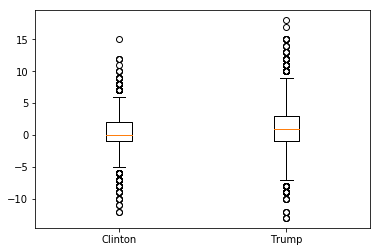

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot([clinton['pscore'], trump['pscore']], labels=["Clinton", "Trump"])
plt.show()

### In aggregate, both candidates have average around 0
* Trump tweets distribution has a wider spread (more positive, more negative) 
* Clinton's tweets are more reserved when it comes to both positive and negative sentiment.

## Summary of Knowledge-based sentiment analysis
* We rely on an external knowledge base to help us determine the sentiment of Tweets. 
* The quality of our sentiment judgements, of course, is reliant on the quality of our knowledge base. 
* Other options

1. AFINN (used above)
2. [General Inquirer](http://www.wjh.harvard.edu/~inquirer/)
3. [Liu Bing's Sentiment Lexicons](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html)
4. [Sentiwordnet](http://sentiwordnet.isti.cnr.it/), included in NLTK


## Make your own sentiment vocabulary using "seeds"
* Tweets from specialized domain (e.g., politics, product reviews) may vary from general use
* If no premade lexicon is available, you can *make* a sentiment lexicon manually:

### Process introduced by Turney 2002 (http://www.aclweb.org/anthology/P02-1053.pdf)
* Start with small set of *seed words* that are positive or negative, and find words strongly associated with seeds. 
* E.g., if a word consistently appears with word *bad*, it must have some negative sentiment. 
* The negativity or positivity from the seed words is propogated to other words in dataset. 


## Pointwise Mutual Information (PMI)
* Measurement of how strongly associated two words are given a corpus and a unit of analysis. * Ratio of how often two words occur together vs. how often we expect them to occur together

$$
\text{PMI}(a, b) = \text{log}\frac{P(a, b)}{P(a) \cdot P(b)}
$$

* P(a, b) is probability that both a and b appear in same unit of analysis (sentence, tweet, doc)
* P(a) is probability that a appears in a unit and 
* P(b) is probability that b appears in a unit. 

### PMI intuition 
* If two words appear together more often than we would expect them to appear by chance, then they are strongly associated. 
* Numerator represents how likely they are to appear together, 
* Denominator represents how often we expect them appear together by chance. 

If we take Tweets to be our unit of analysis:

* $P(a, b)$ is simply the number of Tweets that a and b appear together divided by the total number of tweets
* $P(a)$ is the number of Tweets that a appears in, divided by the total number of tweets
* $P(b)$ is the number of Tweets that b appears in, divided by the total number of tweets

### Semantic Orientation of a Word
* Start with a set of positive and negative seed words. 
* Call positive seed words $V^{+}$ and negative seed words $V^{-}$. 
* Add together its PMIs with the positive words, subtracct the PMIs with negative word

$$
V^{+} = \{\text{good}, \text{great}, \text{better}\} \\
V^{-} = \{\text{bad}, \text{terrible}, \text{worse}\}
$$

The semantic orientation of a word is simply the sum of its PMIs with the positive seed words, minus the sum of its PMIs with negative seed words. 

$$
\text{SO}(w) = \sum_{v^{+} \in V^{+}} \text{PMI}(w, v^{+}) - \sum_{v^{-} \in V^{-}} \text{PMI}(w, v^{-})
$$

Once you have the semantic orientation for all the words in your corpus, you have something similar to the AFINN lexicon - each word has a positive or negative word associated it. From there, you can iterate through all your tweets. 

The step-by-step process of getting from a corpus and seed words to a list of words with semantic orientations is pretty complex, so I've written a function here that will do the work for you. You can copy and paste this code into your own if you wish to take this approach. 

## Function ``getso`` takes four arguments:
* ``seed_pos``: a list containing the positive seed words
* ``seed_neg``: a list containing the negative seed words
* ``texts``: an iterable containing the raw texts
* ``min_df``: an integer, meaning "minimum document frequency". This tells the function to ignore all words that appear less than ``min_df`` times in the corpus. This will remove outliers that appear infrequently and therefore are noise.

### The function returns a dictionary. 
* The keys of the dictionary are words, 
* their corresponding values are the SO calculated for that word.

In [23]:
def getso(seed_pos, seed_neg, texts, min_df):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.preprocessing import binarize
    import numpy as np
    n = len(texts)
    cv = CountVectorizer(min_df=min_df)
    vector = cv.fit_transform(texts)
    rvocab = {v: k for k, v in cv.vocabulary_.items()}
    bvector = binarize(vector)
    docfreq = np.sum(bvector.toarray(), axis=0)
    docfreq = docfreq/n
    docfreq = docfreq.reshape(docfreq.shape[0], 1)
    com = vector.T.dot(vector).toarray()
    np.fill_diagonal(com, 0)
    com = com/n
    p_single = docfreq.dot(docfreq.T)
    pmi = np.divide(com, p_single)
    sos = {}
    for word, index in cv.vocabulary_.items():
        so = 0
        for pos in seed_pos:
            p_index = cv.vocabulary_[pos]
            so += pmi[index, p_index]
        for neg in seed_neg:
            n_index = cv.vocabulary_[neg]
            so -= pmi[index, n_index]
        sos[word] = so
    return sos  

### Take seed words and tweet texts and feed them to this new function. 
* This will result in a dictionary of semantic orientations. 

In [24]:
seed_pos = ["good", "great", "better"]
seed_neg = ["bad", "terrible", "worse"]
texts = df['text']
so = getso(seed_pos, seed_neg, texts, min_df=10)

### What are semantic orientation of words "hillary", "trump", "economy" and "terrorist"?
* "hillary" and "economy" have slightly negative orientations, 
* "trump" has a slightly positive one, 
* while "terrorist" has a very negative one.

In [25]:
print(so['hillary'])
print(so['trump'])
print(so['economy'])
print(so['terrorist'])

-2.74509595015
0.309027941379
-4.85461285009
-13.9458884329


### How effective are our semantic orientations? 
1. Only 5000 tweets, need more data (equal numbers of tweets from both candidates) 
2. Quality of seed words matters 
3. Trump twitter account tends to use more adjectives and seems to influences the semantic orientation outcome slightly more. 

Here's a look at the most positive and negative words, by semantic orientation:

In [26]:
list(sorted(so.items(), key=lambda x:x[1], reverse=True))[:50]

[('barriers', 23.076923076923077),
 ('david', 19.230769230769234),
 ('benefits', 18.641671466722524),
 ('politics', 17.618200783461127),
 ('paying', 16.132720495758157),
 ('facing', 15.384615384615387),
 ('ourselves', 13.986013986013987),
 ('wages', 13.784887678692993),
 ('do', 13.613680347275036),
 ('deserve', 13.206262763784888),
 ('than', 13.03075976803669),
 ('biggest', 13.008824149662459),
 ('evening', 12.798415311792549),
 ('press', 12.69122590382109),
 ('michael', 12.582938164333511),
 ('stay', 12.302350342782848),
 ('looking', 12.254336360805459),
 ('courage', 12.117086453369641),
 ('grow', 12.117086453369641),
 ('tuesday', 11.608402707999575),
 ('rnc', 11.568276684555755),
 ('face', 11.538461538461538),
 ('hate', 11.406153410681092),
 ('spending', 11.25049678976292),
 ('afternoon', 11.223922008033966),
 ('higher', 11.117736699132049),
 ('job', 11.068784712254704),
 ('children', 11.067585144041205),
 ('since', 10.82497763083839),
 ('polls', 10.6869941500645),
 ('100', 10.210465

In [27]:
list(sorted(so.items(), key=lambda x:x[1]))[:25]

[('judgement', -65.36172161172162),
 ('tpp', -46.914623837700759),
 ('getting', -46.800473041297629),
 ('growth', -46.27529554855137),
 ('reporting', -41.666666666666671),
 ('dead', -40.700404743338552),
 ('china', -38.224318747574571),
 ('nafta', -35.880729209524304),
 ('crime', -35.305535201347098),
 ('victims', -34.722222222222221),
 ('attacks', -32.738095238095241),
 ('san', -32.274895646988675),
 ('voted', -31.918579208402218),
 ('wrote', -30.885780885780882),
 ('zero', -29.737379197144584),
 ('possible', -28.733839987992816),
 ('mess', -28.694756570862765),
 ('which', -27.485816210669576),
 ('held', -26.327838827838832),
 ('divided', -26.069726733443552),
 ('anti', -25.635794913640694),
 ('crazy', -25.248835158010753),
 ('course', -23.708010335917315),
 ('income', -22.727272727272727),
 ('call', -22.588522588522586)]

Some the negative words do seem to be appropriately marked (dead, crime, victims, attacks, mess), but others seem to again be indicative of a bias towards Trump (due to negative marks for words like "TPP" and "China"). The words classified as highly positive aren't exactly of high quality. Words like barrier, facing, and David are scored as being highly positive.

There are a few of reasons for this unimpressive result:

* As I mentioned, for the task of automatic lexicon generation, this is a pretty small dataset. There really isn't enough text here to demonstrate that two given words have a strong relationship. If you use this approach, try to have more than 5000 texts available to you.
* The quality of automatic lexicon generation depends very much on the words you choose as positive and negative seeds. I just "guessed" words such as "good", "great", and "better" to be positive words, but it would probably be better for you to do a systematic exploration of your data to find some good seed words. Choosing *more* seed words would also help.

Assuming you do get a decent lexicon from this automatic process, you can then take a route similar with AFINN; go through each tweet, add up the SO scores for each word in the tweet, and you have one number representing the polarity of the tweet.

# Supervised vs. Unsupervised
* Unsupervised task: unlabeled data from *external knowledge base* `AFINN` to assign quantitative measure of polarity. 
* Drawback of unsupervised learning: no systematic way to evaluate it. 
* Supervised task: train classifier on labeled tweets, evaluate sentiment, but we don't know whether a Tweet is positive or negative -

## How to get to supervised learning?
* Labels from previous examples: Iris species, Tweet from iPhone/Android. 

### 1. Manually Labeling a set of Tweets
* Subset tweets and manually identify them as positive or negative is difficult and tedious work, but someone eventually has to do it. 
* Best practice: multiple people annotate tweets and compare results between different coders for "Inter-rate Reliability" 
* Amazon Mechanical Turk "crowdsourcing" to annotate the tweets,  

## 2. Use Existing dataset
* Labeled dataset relevant to your research interest may already exist. 
* Train classifier on large sample assuming high-quality annotations.

## 3. Use `proxy` in data for sentiment
* Find indicator in data as unambiguous proxy for pos./neg. sentiment. 
* Tweets with smile emoticon, ":)", are positive, sad emoticon, ":(", is a negative one. 
* Train classifier on subset of tweets, use model to classify tweets with no emoticons.

# Example: Supervised Learning 
* Train sentiment classifier using combination of approaches 2 and 3 described above. 
* `Sentiment140` classifier allows you discover the sentiment of a brand, product, or topic on Twitter. 
* Dataset containing 1,600,000 tweets ending in either a smiling emoticon ":)" or a negative emoticon ":(". 
* Positive tweets were assigned label of 4, negative tweets label of 0. 

## Data set saved in .csv format on Canvas. 
* Import data frame to python using Pandas 
* Fit classifier model on training data
* Predict test data with classifier model: Clinton/Trump tweets.  

In [28]:
training = pd.read_csv("training.1600000.processed.noemoticon.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

## Represent tweet texts as vector using TFIDF vectorizer. 
* Call named argument ``min_df`` with value of 10 to tell the vectorizer to ignore all words that occur in fewer than 10 tweets. 
* Words that occur infrequently don't have much statistical weight but also would increase dimensionality of vectors, so we ignore them.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=50)
X = tv.fit_transform(training['text'])

In [30]:
X.shape

(1600000, 13451)

## Training Data
* X matrix has 1,600,000 rows (one for each sample) and 43,448 columns, with 43,448 unique words in dataset that occur in 10 or more tweets. 
* Get polarity column from data to serve as our labels in variable ``y``. 
* Shuffle data using ``shuffle``, in case data is stored in specific order

## Use subset of Training data
* Training a model on 1,600,000 samples would take a long time. 
* Obtain 500,000 tweets to shorten training time (instruction purposes) 
* Otherwise, train your model on as many data points as possible, regardless of time. 

In [31]:
y = training['polarity']

from sklearn.utils import shuffle

X, y = shuffle(X, y)

X, y = X[:50000], y[:50000]

### Use SkLearn in familiar fashion. 
* Train linear SVM on the data. 
* Split data into train and test sets 
* Use held-out test data to evaluate model performance. 

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)
clf = SVC(kernel="linear", verbose=3)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=3)

In [33]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.77464

### Evaluate Model Performance
* Accuracy of SVM model is 77% on held out data.

## Use trained classifier model to predict new test values
* Convert data into same vector representations used to train classifier
* Use TFIDF vectorizer used on training data, saved as variable ``tv``. 
* Use ``.transform()`` method  **instead** of ``.fit_transform()``. 

### FIDF Vectorizer has already been fit to the training data. 
* Transform our Tweet texts into TF-IDF representation and not fit the vectorizer to it. 

In [34]:
tweet_tfidf = tv.transform(df['text'])

## Predict already-trained classifier.

In [35]:
tweet_pred = clf.predict(tweet_tfidf)

### Add predictions of classifier to data frame. 

In [36]:
df["sent_pred"] = tweet_pred

### Print first 50 Tweets and label assigned by classifier
* 0 means negative and 4 means positive. 
* Not perfect, but decent. 

In [37]:
for index, row in df.head(50).iterrows():
    print((row['text'], row['sent_pred']))
    print("*"*50)

('Remember, don\'t believe "sources said" by the VERY dishonest media. If they don\'t name the sources, the sources don\'t exist.', 0)
**************************************************
('Did Crooked Hillary help disgusting (check out sex tape and past) Alicia M become a U.S. citizen so she could use her in the debate?', 4)
**************************************************
('Using Alicia M in the debate as a paragon of virtue just shows that Crooked Hillary suffers from BAD JUDGEMENT! Hillary was set up by a con.', 4)
**************************************************
('Wow, Crooked Hillary was duped and used by my worst Miss U. Hillary floated her as an "angel" without checking her past, which is terrible!', 0)
**************************************************
('Anytime you see a story about me or my campaign saying "sources said," DO NOT believe it. There are no sources, they are just made up lies!', 4)
**************************************************
('Wow, did you see how badly